In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
#!pip install pmdarima
from pmdarima import auto_arima

In [17]:
co2_data = sm.datasets.co2.load_pandas().data
co2_data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [18]:
#look for Non values
co2_data.isnull().sum()


co2    59
dtype: int64

In [19]:
#fill in the missing values
co2_data.fillna(method='ffill', inplace=True)   #forward fill
co2_data.isnull().sum() 


co2    0
dtype: int64

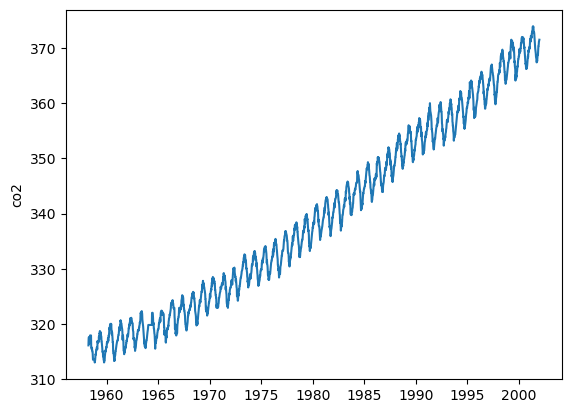

In [20]:
plot = sns.lineplot(x=co2_data.index, y=co2_data['co2'])

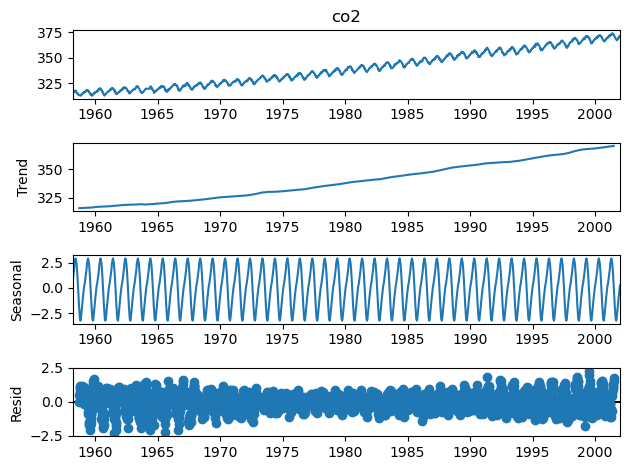

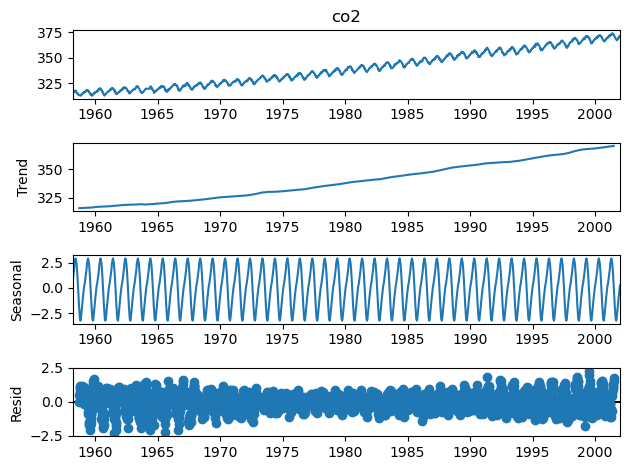

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(co2_data['co2'], model='additive')
result.plot()


In [25]:
#test for stationarity
from statsmodels.tsa.stattools import adfuller
adfuller(co2_data['co2'])
print('ADF Statistic: %f' % adfuller(co2_data['co2'])[0])

ADF Statistic: 0.046051


/Users/ericvandusen/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


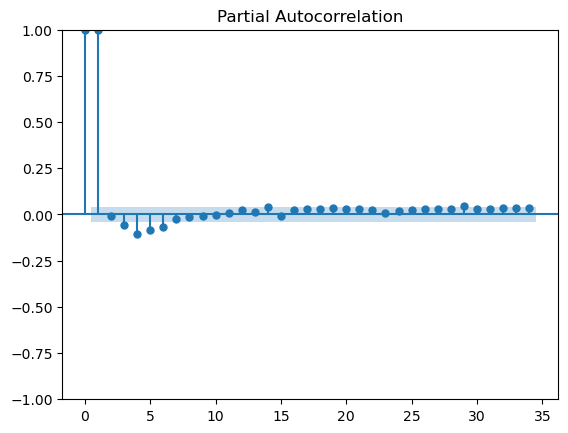

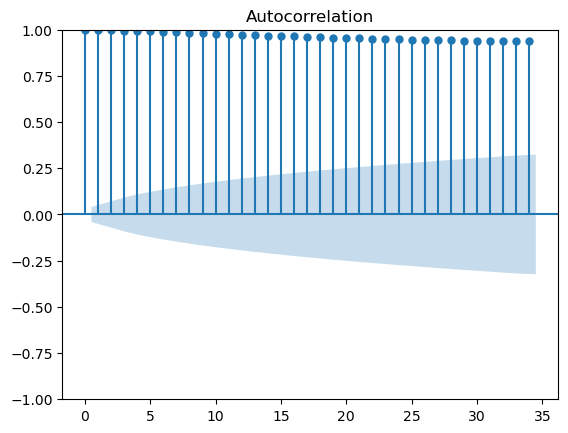

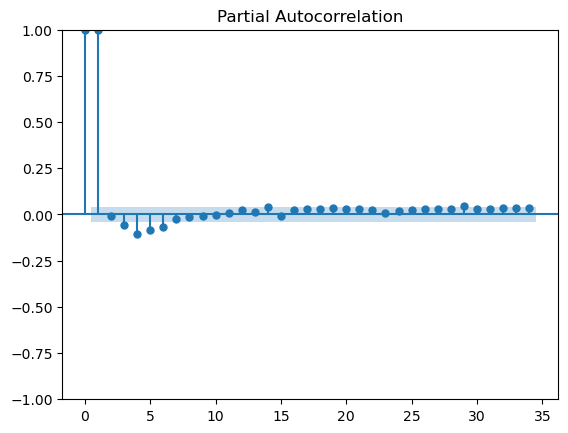

In [26]:
#plot the ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(co2_data['co2'])
plot_pacf(co2_data['co2'])


In [27]:
from statsmodels.tsa.arima.model import ARIMA


In [28]:
#fit ARIMA model
model = ARIMA(co2_data['co2'], order=(6,1,6))
model_fit = model.fit()
print(model_fit.summary())



/Users/ericvandusen/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ericvandusen/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                 2284
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -1381.112
Date:                Wed, 12 Apr 2023   AIC                           2788.223
Time:                        12:18:37   BIC                           2862.755
Sample:                    03-29-1958   HQIC                          2815.407
                         - 12-29-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1137      0.206     -0.552      0.581      -0.518       0.290
ar.L2          0.8788      0.203      4.326      0.000       0.481       1.277
ar.L3          0.9799      0.287      3.416      0.0

/Users/ericvandusen/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
#autoarima
from pmdarima import auto_arima
stepwise_fit = auto_arima(co2_data['co2'], start_p=1, start_q=1,
                            max_p=6, max_q=6, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)
print(stepwise_fit.summary())

    

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=7.69 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4909.442, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4311.956, Time=0.55 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4872.296, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4049.850, Time=0.96 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=15.04 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=5.66 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4134.585, Time=0.73 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=3936.564, Time=1.27 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4198.012, Time=0.57 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=20.10 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=5.05 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=3697.920, Time=1.76 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=3948

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(co2_data['co2'], order=(5,1,0), seasonal_order=(2,1,0,12))
results = model.fit()
print(results.summary())


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.23402D-01    |proj g|=  4.96201D-01

At iterate    5    f=  7.82266D-01    |proj g|=  1.40540D-02

At iterate   10    f=  7.81584D-01    |proj g|=  5.06000D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     12     15      1     0     0   2.925D-06   7.816D-01
  F =  0.78158429255369843     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                  